# MODULE 2 : Regression of NPK values using a Multi-Output Regressio Algorithm

# Importing libraries

In [23]:
import numpy as np
import pandas as pd

# for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for visualisations
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split, cross_val_score

# Regressors used
from sklearn.multioutput import MultiOutputRegressor
## KNN
from sklearn.neighbors import KNeighborsRegressor
##  MLP Regression
from sklearn.neural_network import MLPRegressor
## SVM
from sklearn.svm import SVR
## Decision Tree
from sklearn.tree import DecisionTreeRegressor
## Random Forest
from sklearn.ensemble import RandomForestRegressor
## Radius Neighbors
from sklearn.neighbors import RadiusNeighborsRegressor

## Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
## XGBoost
import xgboost as xgb

## Bagging
from sklearn.ensemble import BaggingRegressor

# for performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# for exporting ML model
import pickle, dill

#  **Importing the dataset**

In [24]:
df = pd.read_csv('datasets/crop_data.csv', encoding='latin')
df

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,30
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,30
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,30
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,30
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,30
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,20
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,20
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,20
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,20


# **Preprocessing the data**

> ## Handling Missing Values

In [25]:
df.isna().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
label            0
soil_moisture    0
dtype: int64

In [6]:
# df.interpolate(method = 'linear', inplace = True)
# df.isna().sum()

> ## Count of unique values

In [26]:
df.nunique()

N                 137
P                 117
K                  73
temperature      2200
humidity         2200
ph               2200
rainfall         2200
label              22
soil_moisture      10
dtype: int64

> ## Correlation between different variables

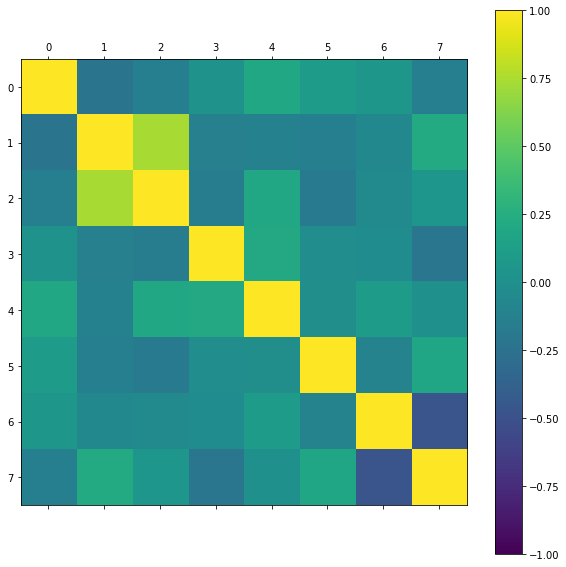

In [27]:
fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

> ## Skewness of the features

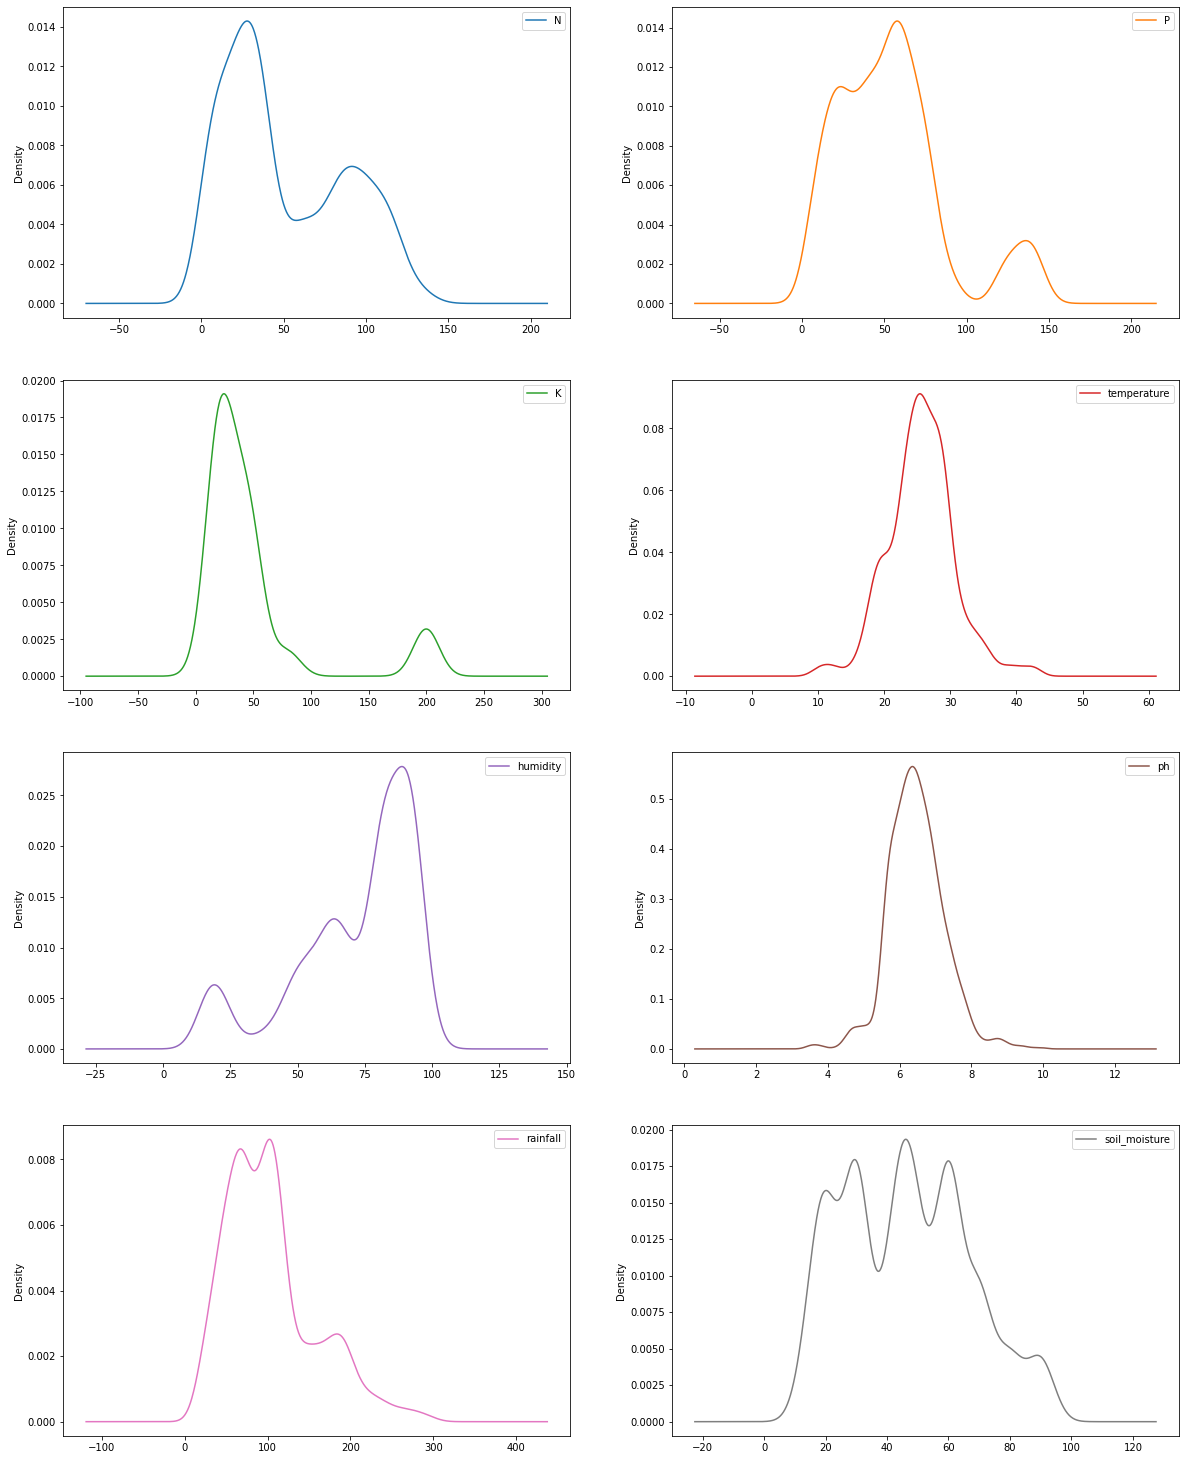

In [28]:
df.plot(kind='density',subplots=True,layout=(6, 2),sharex=False)
plt.rcParams["figure.figsize"] = (20, 40)
plt.show()


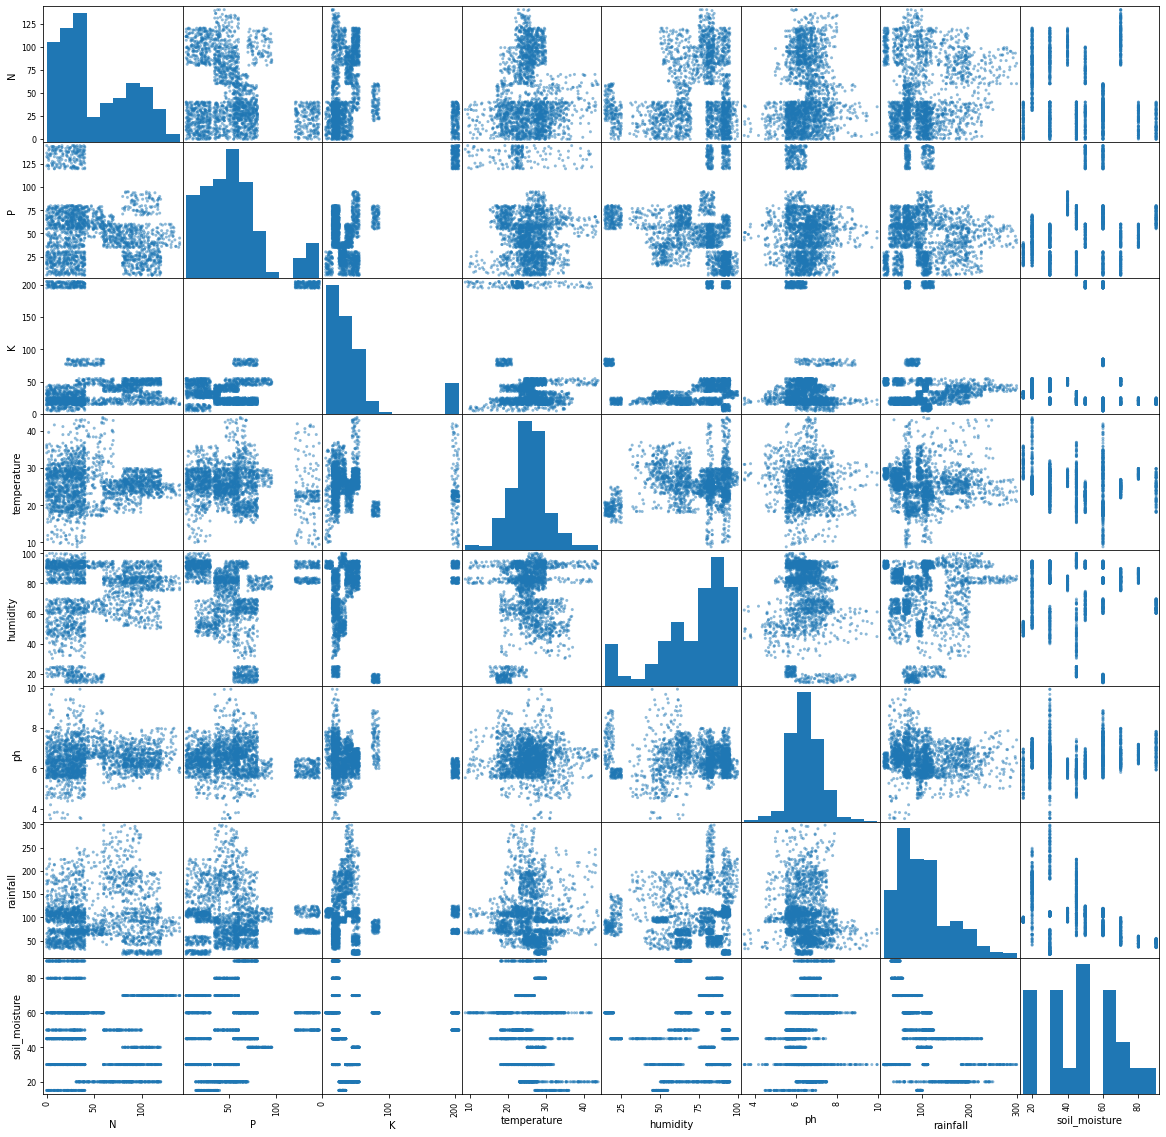

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20))
plt.show()


In [30]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

for i in range(0, 9):
    fig.add_trace(go.Box(y=df.iloc[:, i], name=df.columns.to_list()[i]))

#fig = px.box(df, x = '', y = '')
fig.update_traces(boxpoints='all', jitter=0)
fig.update_layout(title='Outliers Detection')
fig.show()

# **Taking the Independent and Dependent variables**

In [33]:
X = df.iloc[:, [3, 4, 5, 6, 8]].values
y = df.iloc[:, 0:3].values

acc = []
cm = []
cv_score = []
myModels = []

In [34]:
# Splitting the dataset into training and testing set
# X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

## **Seperating features and target variables**

In [35]:
features = df[['temperature', 'humidity', 'ph', 'rainfall', 'soil_moisture']]
target = df['label']
labels = df['label']

# **Feature Importance / Selection**

> ## Test for numerical input and categorical output

1.   ANOVA (Analysis of Variance) correlation coefficient (linear)
2.   Kendall’s rank coefficient (nonlinear)



In [16]:
# ANOVA
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(f_classif, k=4)
# selector.fit(X_train, y_train)
# scores = -np.log10(selector.pvalues_)
# scores /= scores.max()

In [17]:
# import matplotlib.pyplot as plt

# X_indices = np.arange(X.shape[-1])
# plt.figure(1)
# plt.clf()
# plt.bar(X_indices - 0.05, scores, width=0.2)
# plt.title("Feature univariate score")
# plt.xlabel("Feature number")
# plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
# plt.show()

> ## Test for categorical input and categorical output

1.   Chi-Squared test (contingency tables)
2.   Mutual Information



# **Feature Scaling**

In [19]:
# sc= StandardScaler()    
# X_train= sc.fit_transform(X_train)    
# X_test= sc.transform(X_test) 

# **K-Nearest Neighbor (KNN) using Manhattan Distance Measure**

## Training the model

In [36]:
regressor = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=22, metric='minkowski', p=1))
regressor.fit(X_train, y_train)  
knn1 = regressor

## Testing the model

In [42]:
# from sklearn.metrics import regression_report
y_pred= regressor.predict(X_test)  
# print(regression_report(y_test, y_pred))
print(y_test)

[[101  17  47]
 [ 98   8  51]
 [ 59  62  49]
 ...
 [121  47  16]
 [116  52  19]
 [  5  68  20]]


In [43]:
y_pred

array([[ 99.31818182,  15.31818182,  49.68181818],
       [ 96.81818182,  18.13636364,  50.90909091],
       [ 43.13636364,  47.31818182,  47.27272727],
       ...,
       [116.36363636,  46.09090909,  19.5       ],
       [116.09090909,  43.86363636,  19.81818182],
       [ 19.13636364,  68.54545455,  20.95454545]])

## Validating the model using different performance metrics

In [407]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [408]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([0.97727273, 0.98181818, 0.98863636, 0.96818182, 0.975     ])

# **K-Nearest Neighbor (KNN) using Euclidean Distance Measure**

## Training the model

In [409]:
classifier= KNeighborsClassifier(n_neighbors=22, metric='minkowski', p=2)  
classifier.fit(X_train, y_train)
knn2 = classifier  

## Testing the model

In [410]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.92      1.00      0.96        23
      banana       0.84      1.00      0.91        21
   blackgram       0.95      1.00      0.98        20
    chickpea       0.96      1.00      0.98        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      0.94      0.94        17
      cotton       1.00      0.88      0.94        17
      grapes       0.88      1.00      0.93        14
        jute       0.79      1.00      0.88        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        11
       maize       0.91      1.00      0.95        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       0.94      1.00      0.97        17
      orange       1.00      0.79      0.88        14
      papaya       1.00    

## Validating the model using different performance metrics

In [411]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [412]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([0.96590909, 0.96590909, 0.975     , 0.95909091, 0.95909091])

# **K-Nearest Neighbor (KNN) using Minkowski Distance Measure**

## Training the model

In [413]:
classifier= KNeighborsClassifier(n_neighbors=22, metric='minkowski', p=3)  
classifier.fit(X_train, y_train)  
knn3 = classifier

## Testing the model

In [414]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.92      1.00      0.96        23
      banana       0.84      1.00      0.91        21
   blackgram       0.95      1.00      0.98        20
    chickpea       0.96      1.00      0.98        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      0.88      0.91        17
      cotton       0.94      0.88      0.91        17
      grapes       0.87      0.93      0.90        14
        jute       0.70      1.00      0.82        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        11
       maize       0.88      1.00      0.93        21
       mango       0.86      1.00      0.93        19
   mothbeans       0.95      0.88      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       0.94      1.00      0.97        17
      orange       1.00      0.79      0.88        14
      papaya       1.00    

## Validating the model using different performance metrics

In [415]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [416]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([0.95909091, 0.95681818, 0.97045455, 0.95454545, 0.95      ])

# **Logistic Regression**

## Training the model

In [417]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
lr = classifier

## Testing the model

In [418]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.96      0.96      0.96        23
      banana       0.91      1.00      0.95        21
   blackgram       0.83      1.00      0.91        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.88      0.94        17
      grapes       0.73      0.79      0.76        14
        jute       0.96      1.00      0.98        23
 kidneybeans       0.90      0.95      0.93        20
      lentil       1.00      1.00      1.00        11
       maize       0.90      0.86      0.88        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      0.93      0.93        14
      papaya       1.00    

## Validating the model using different performance metrics

In [419]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [420]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Program Files\Python310\lib\site-pa

array([0.93409091, 0.94545455, 0.95      , 0.93863636, 0.93409091])

# **Support Vector Machine (SVM)**

## Training the model

In [421]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
svc = classifier

## Testing the model

In [422]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        11
       maize       0.91      1.00      0.95        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Validating the model using different performance metrics

In [423]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [424]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([1., 1., 1., 1., 1.])

# **Naive Bayes (NB)**

## Training the model

In [425]:
# gnb = GaussianNB(priors=None, var_smoothing=1.0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
nb = classifier

## Testing the model

In [426]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      1.00      0.98        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Validating the model using different performance metrics

In [427]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [428]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([0.99772727, 1.        , 0.99772727, 0.99090909, 1.        ])

# **Decision Tree Classifier**

## Training the model

In [429]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
dt = classifier

## Testing the model

In [430]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      1.00      1.00        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Validating the model using different performance metrics

In [431]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [432]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([1.        , 1.        , 1.        , 0.99772727, 1.        ])

# **Random Forest Classifier**

## Training the model

In [433]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
rfc = classifier

## Testing the model

In [434]:
y_pred= classifier.predict(X_test)  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.59      1.00      0.74        23
      banana       1.00      0.52      0.69        21
   blackgram       0.49      0.90      0.63        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.67      0.80        27
      coffee       0.77      1.00      0.87        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.78      0.88        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.61      1.00      0.76        11
       maize       0.55      0.86      0.67        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.33      0.50        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.82      1.00      0.90        14
      papaya       1.00    

C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Validating the model using different performance metrics

In [435]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [436]:
cv_score.append(cross_val_score(classifier, features, target, cv=5))
cross_val_score(classifier, features, target, cv=5)

array([0.87272727, 0.89090909, 0.92272727, 0.89318182, 0.94318182])

# **XGBoost Classifier**

## Training the model

In [437]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)

In [438]:
classifier = xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
classifier.fit(X_train, y_train_le)
xgbc = classifier

## Testing the model

In [439]:
y_pred= le.inverse_transform(classifier.predict(X_test))  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      1.00      1.00        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Validating the model using different performance metrics

In [440]:
acc.append(round((accuracy_score(y_test, y_pred) * 100), 2))
cm.append(confusion_matrix(y_test, y_pred))

## **Cross-validation score**

In [441]:
cv_score.append(cross_val_score(classifier, features, le.fit_transform(target), cv=5))
cross_val_score(classifier, features, le.fit_transform(target), cv=5)

array([0.99090909, 0.99772727, 0.99545455, 0.99545455, 0.99772727])

# **Printing the accuracies**

In [442]:
algos = ['KNN (using p=1) Manhattan', 'KNN (using p=2) Euclidean', 'KNN (using p!=[1, 2]) Minkowski', 'Logistic Regression', 'SVM Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier']
# acc_table = pd.DataFrame(acc, index =algos, columns =['Accuracy Score (in %)'])
acc_table = pd.DataFrame(list(zip(algos, acc)), columns =['Algorithm', 'Accuracy'])
# for i in range (0, len(algos)):
#   print("\nConfusion Matrix with ", algos[i],": \n\n",cm[i])
#   print("\nAccuracy with ", algos[i],": ", round(acc[i], 2)," %")
acc_table.sort_values(by="Accuracy", ascending=False)

,Algorithm,Accuracy
6,Decision Tree Classifier,100.00
5,Naive Bayes Classifier,99.77
8,XGBoost Classifier,99.77
4,SVM Classifier,98.41
0,KNN (using p=1) Manhattan,96.14
3,Logistic Regression,95.00
1,KNN (using p=2) Euclidean,93.86
2,"KNN (using p!=[1, 2]) Minkowski",91.59
7,Random Forest Classifier,79.32


## **Visualising the accuracy scores**

<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

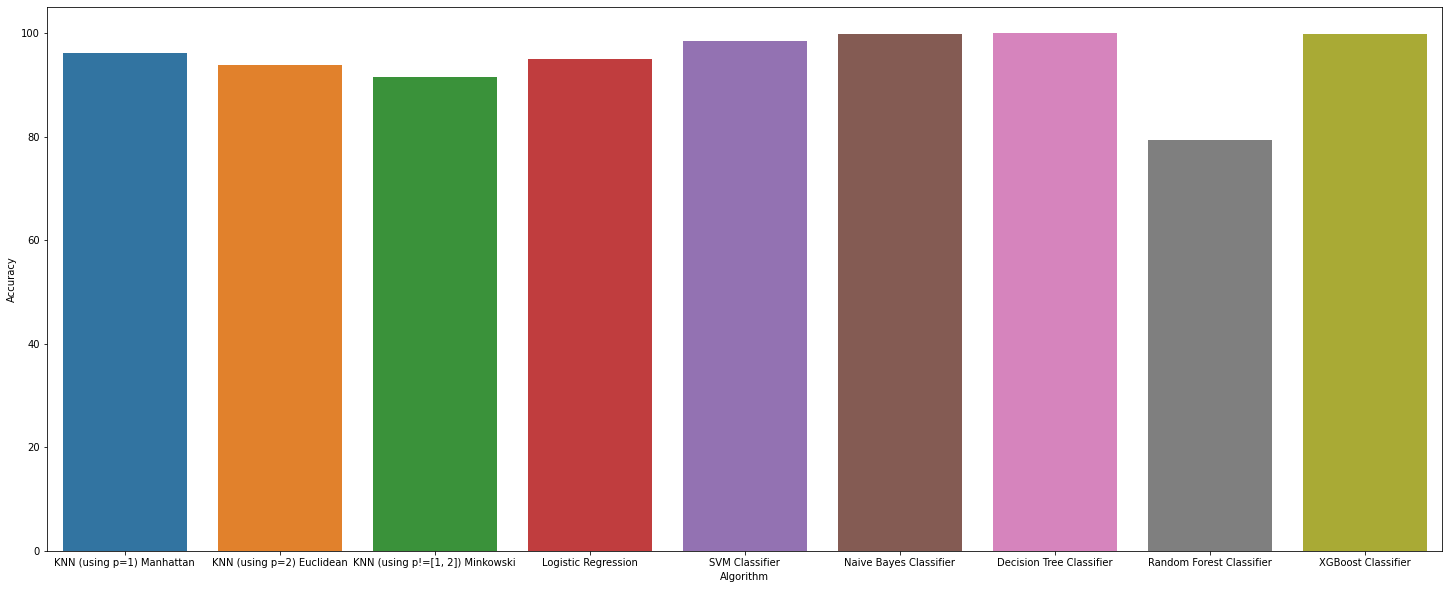

In [443]:
# df = sns.load_dataset("penguins")
plt.figure(figsize=(25,10))
sns.barplot(data=acc_table, x="Algorithm", y="Accuracy")

## **Exporting the ML models**

In [444]:
myModels = [knn1, knn2, knn3, lr, svc, nb, dt, rfc, xgb]
modelNames = ['knn1', 'knn2', 'knn3', 'lr', 'svc', 'nb', 'dt', 'rfc', 'xgb']

import dill
from dill import dumps, loads

for i in range(0, 9):
    with open(str(modelNames[i] + '_' + str(acc[i]) + '.pkl'), 'wb') as file:
        dill.dump(myModels[i], file)
    file.close()

In [39]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [40]:
classifier = nb

In [41]:
print("\nEnter the values for Chemical Constraints : ")
nlevel = float(input("\nNitrogen level : "))
plevel = float(input("\nPhosphorous level : "))
klevel = float(input("\nPotassium level : "))
print("\nEnter the values for Physical Constraints : ")
temp = float(input("\nTemperature : "))
humid = float(input("\nHumidity level : "))
ph = float(input("\npH level : "))
rain = float(input("\nRainfall (in cms) : "))

label = classifier.predict(sc.transform([[nlevel, plevel, klevel, temp, humid, ph, rain]]))
print("The predicted crop is : ", label)


Enter the values for Chemical Constraints : 

Nitrogen level : 90

Phosphorous level : 46

Potassium level : 67

Enter the values for Physical Constraints : 

Temperature : 67

Humidity level : 0

pH level : 9

Rainfall (in cms) : 9
The predicted crop is :  ['pigeonpeas']


In [42]:
label = classifier.predict(sc.transform([[nlevel, plevel, klevel, temp, humid, ph, rain]]))
print("The predicted crop is : ", label)

The predicted crop is :  ['pigeonpeas']
